In [45]:
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.api as sm

 
### Source Code :https://docs.google.com/viewerng/viewer?url=https://s3.amazonaws.com/acadgildsite/course/masteringdatascience%5Csession22/ACD_MDS_V2_Session_22_Main.pdf

In [46]:
import matplotlib.pyplot as plt
% matplotlib inline

In [47]:
a=np.linspace(-3,3,500,endpoint=True)

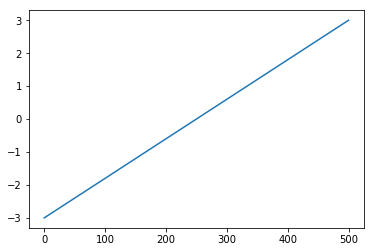

In [48]:
plt.plot(a)
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
b=1/(1+np.power(np.e,-a))

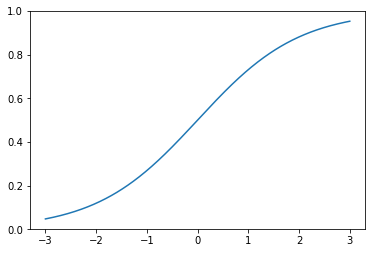

In [51]:
plt.plot(a,b)

In [52]:
max(b)


0.95257412682243314

In [53]:
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score


In [54]:
dta=sm.datasets.fair.load_pandas().data

In [55]:
dta['affair']=(dta.affairs > 0).astype(int)

In [56]:
dta.columns.tolist()

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'occupation',
 'occupation_husb',
 'affairs',
 'affair']

In [57]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [58]:
dta


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [59]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


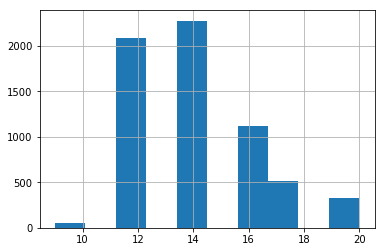

In [60]:
dta.educ.hist()

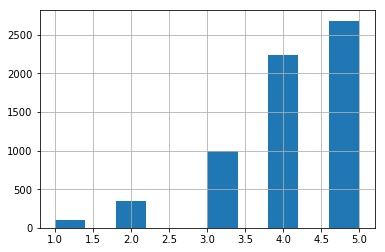

In [61]:
dta.rate_marriage.hist()

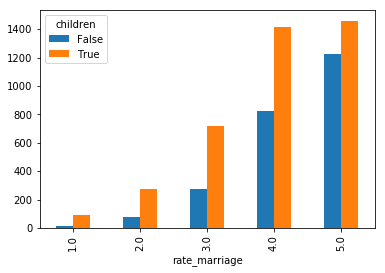

In [62]:
pd.crosstab(dta.rate_marriage,dta.children.astype(bool)).plot(kind='bar')

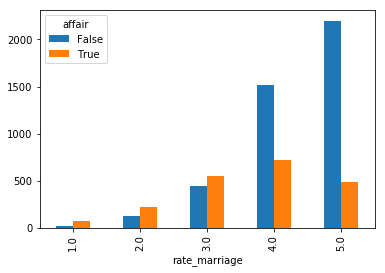

In [63]:
pd.crosstab(dta.rate_marriage,dta.affair.astype(bool)).plot(kind='bar')


In [64]:
dta.occupation.value_counts()

3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64

In [65]:
dta.shape

(6366, 10)

In [66]:
dta.affair.value_counts().sum()

6366

In [67]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [68]:
y,X=dmatrices('affair ~ rate_marriage +age+yrs_married+children+\
                  religious+ educ +C(occupation)+C(occupation_husb)',
             dta,return_type='dataframe')

X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [69]:
X=X.rename(columns={'C(occupation)[T.2.0]':'occ_2',
                   'C(occupation)[T.3.0]':'occ_3',
                   'C(occupation)[T.4.0]':'occ_4',
                   'C(occupation)[T.5.0]':'occ_5',
                   'C(occupation)[T.6.0]':'occ_6',
                   'C(occupation_husb)[T.2.0]':'occ_husb_2',
                   'C(occupation_husb)[T.3.0]':'occ_husb_3',
                   'C(occupation_husb)[T.4.0]':'occ_husb_4',
                   'C(occupation_husb)[T.5.0]':'occ_husb_5',
                   'C(occupation_husb)[T.6.0]':'occ_husb_6',
                   })

In [70]:
y=np.ravel(y)

In [71]:
y

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [72]:
model=LogisticRegression()
model=model.fit(X,y)

In [73]:
model.score(X,y)

0.72588752748978946

In [74]:
y.mean()

0.32249450204209867

In [75]:
X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [76]:
np.transpose(model.coef_)

array([[ 1.48988379],
       [ 0.18804558],
       [ 0.49892627],
       [ 0.25064649],
       [ 0.83898295],
       [ 0.83392124],
       [ 0.19054687],
       [ 0.29774459],
       [ 0.16131946],
       [ 0.18768302],
       [ 0.19391685],
       [-0.7031196 ],
       [-0.05841784],
       [ 0.10567682],
       [ 0.01691979],
       [-0.37113489],
       [ 0.00401598]])

In [77]:
import statsmodels.discrete.discrete_model as sm

In [78]:
logit=sm.Logit(y,X)
logit.fit().params

Optimization terminated successfully.
         Current function value: 0.542911
         Iterations 6


Intercept        2.970755
occ_2            0.390239
occ_3            0.702679
occ_4            0.471397
occ_5            1.054197
occ_6            1.108015
occ_husb_2       0.170447
occ_husb_3       0.284173
occ_husb_4       0.142841
occ_husb_5       0.172329
occ_husb_6       0.182763
rate_marriage   -0.710228
age             -0.061279
yrs_married      0.107976
children         0.015645
religious       -0.375386
educ            -0.001725
dtype: float64

In [79]:
result_=logit.fit()

Optimization terminated successfully.
         Current function value: 0.542911
         Iterations 6


In [80]:
print(result_.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6349
Method:                           MLE   Df Model:                           16
Date:                Tue, 25 Sep 2018   Pseudo R-squ.:                  0.1365
Time:                        15:19:54   Log-Likelihood:                -3456.2
converged:                       True   LL-Null:                       -4002.5
                                        LLR p-value:                1.534e-222
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.9708      0.572      5.192      0.000       1.849       4.092
occ_2             0.3902      0.448      0.872      0.383      -0.487       1.267
occ_3             0.7027      0.441     

In [83]:

pd.crosstab(y,np.where(result_.predict(X)>0.5,1,0))

col_0,0,1
row_0,,
0.0,3883,430
1.0,1318,735


In [89]:
from sklearn.metrics import accuracy_score
result_.predict(X)
accuracy_score(y,np.where(result_.predict(X)>0.5,1,0))

0.72541627395538799

In [91]:

np.mean(y)

0.32249450204209867

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
model2=LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
predicted=model2.predict(X_test)
predicted


array([ 1.,  0.,  0., ...,  0.,  0.,  0.])

In [94]:
pd.value_counts(predicted)

0.0    1551
1.0     359
dtype: int64

In [95]:
pd.crosstab(y_test,predicted)

col_0,0.0,1.0
row_0,,
0.0,1169,134
1.0,382,225


In [99]:
print('train accuracy is ' +str(100*model.score(X_train,y_train)) )

train accuracy is 72.3070017953


In [100]:
print('test accuracy is ' + str(100*((1169+225)/len(predicted))))

test accuracy is 72.98429319371728


In [101]:
scores=cross_val_score(LogisticRegression(),X,y, scoring='accuracy',cv=10)
scores, scores.mean()

(array([ 0.72100313,  0.70219436,  0.73824451,  0.70597484,  0.70597484,
         0.72955975,  0.7327044 ,  0.70440252,  0.75157233,  0.75      ]),
 0.7241630685514876)

In [104]:
# GENERATE CLASS PROBABILITIES

probs= model2.predict_proba(X_test)

probs

array([[ 0.35146331,  0.64853669],
       [ 0.90955083,  0.09044917],
       [ 0.72567332,  0.27432668],
       ..., 
       [ 0.55727384,  0.44272616],
       [ 0.81207045,  0.18792955],
       [ 0.74734598,  0.25265402]])

In [105]:
# generate evaluation matrix

print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test,probs[:,1]))

0.729842931937
0.745950606951


In [107]:
#confusion and classification report

print(metrics.confusion_matrix(y_test,predicted))


[[1169  134]
 [ 382  225]]


In [108]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910

